In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(columns=["Unnamed: 0"],inplace=True,axis=1)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.iloc[:,:-1].values
Y= df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [7]:
import tensorflow as tf

In [8]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=5,activation='relu'))
ann.add(tf.keras.layers.Dense(units=5,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [9]:
ann.compile(optimizer = 'adam',loss='mean_squared_error')
ann.fit(X_train,y_train,epochs=500,batch_size=5)

Epoch 1/500
32/32 [==============================] - 1s 1ms/step - loss: 1906.3336
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 1142.7184
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 688.4235
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 430.9824
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 270.3786
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 172.1944
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 109.4027
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 66.4447
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 39.0355
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 23.9598
Epoch 11/500
32/32 [==============================] - 0s 1ms/step - loss: 17.1662
Epoch 12/500
32/32 [==============================] - 0s 1ms/step - loss: 15.1823
Epoch 13/500
32/

In [10]:
y_pred_ann = ann.predict(X_test)
for i,j in zip(y_pred_ann,y_test):
  print(i,j,(i-j))

2/2 [==============================] - 0s 5ms/step
[23.68398] 23.8 [-0.1160183]
[16.370857] 16.6 [-0.22914314]
[7.9874907] 9.5 [-1.5125093]
[15.211847] 14.8 [0.4118471]
[17.461239] 17.6 [-0.13876152]
[23.829304] 25.5 [-1.6706963]
[17.87075] 16.9 [0.9707508]
[12.994301] 12.9 [0.09430122]
[11.182156] 10.5 [0.6821556]
[17.213417] 17.1 [0.11341667]
[15.102678] 14.5 [0.6026783]
[11.10139] 11.3 [-0.1986103]
[16.958279] 17.4 [-0.44172096]
[16.285381] 16.7 [-0.41461945]
[13.502438] 13.4 [0.10243797]
[17.30811] 15.9 [1.4081097]
[13.506599] 12.9 [0.6065998]
[13.8577175] 12.8 [1.0577173]
[8.291137] 9.5 [-1.2088633]
[18.307184] 18.4 [-0.0928154]
[10.206846] 10.7 [-0.49315357]
[12.67829] 12.5 [0.17829037]
[7.848028] 8.5 [-0.6519718]
[11.575577] 11.5 [0.07557678]
[12.775549] 11.9 [0.8755493]
[14.873978] 14.9 [-0.02602196]
[9.358342] 10.1 [-0.7416582]
[18.78253] 18.9 [-0.11746979]
[20.338232] 19.6 [0.73823166]
[15.864613] 15.9 [-0.03538704]
[22.23995] 23.2 [-0.9600506]
[12.672028] 11.9 [0.77202797]
[

In [11]:
plt.rcParams['figure.figsize']  = (6,6)

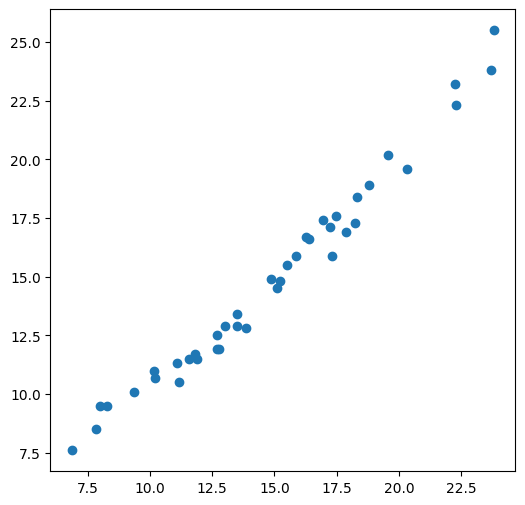

In [12]:
plt.scatter(y_pred_ann,y_test)

In [13]:
from sklearn.metrics import r2_score
r2_score(y_pred_ann,y_test)

0.9743052030112954